In [50]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from scipy.stats import boxcox
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.mlab as mlab
import seaborn as sns
from matplotlib import rcParams
rcParams['figure.figsize'] = 14, 3
#rcParams['figure.figsize'] = 6, 3.27

In [4]:
#Прочитаем все файлы
df=pd.read_csv('sales_train.csv')
df1=pd.read_csv('deploy_example.csv')
df2=pd.read_csv('advert_train.csv')
df3=pd.read_csv('advert_test.csv')

In [5]:
df.head()

,date,market_1,market_2,market_3,market_4,market_5,market_6,market_7,market_8
0,2008-01-02,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,2008-01-03,NaN,1.006943,1.002595,1.006953,1.014819,NaN,1.008989,1.003241
2,2008-01-04,1.015188,NaN,1.043535,1.044507,1.050865,1.025508,1.037337,1.024117
3,2008-01-05,NaN,1.045076,NaN,1.080214,1.071665,NaN,NaN,1.028124
4,2008-01-06,0.995762,1.000988,1.051633,1.056388,1.047756,1.002896,1.027538,0.990433


In [6]:
df3.head()

,date,market_1,market_2,market_3,market_4,market_5,market_6,market_7,market_8
0,2016-01-01,0,0,0,0,0,0,0,0
1,2016-01-02,0,0,0,0,0,0,0,0
2,2016-01-03,0,0,0,0,0,0,0,0
3,2016-01-04,0,0,0,0,0,0,0,0
4,2016-01-05,0,0,0,0,0,0,0,0


In [7]:
# добавим временные значения  год, квартал, месяц, день к каждому из df
dataframes = [df, df1, df2, df3]

for dtf in dataframes:
    dtf['date'] = pd.to_datetime(dtf['date'])
    dtf['year'] = dtf['date'].dt.year
    dtf['quarter'] = dtf['date'].dt.quarter
    dtf['month'] = dtf['date'].dt.month
    dtf['weekday'] = dtf['date'].dt.weekday

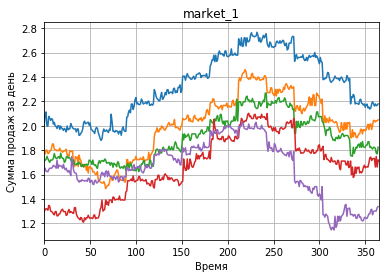

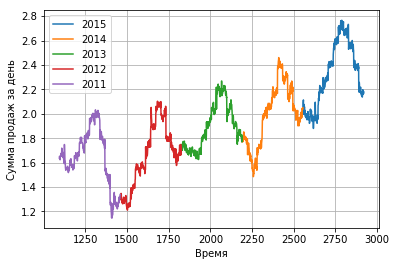

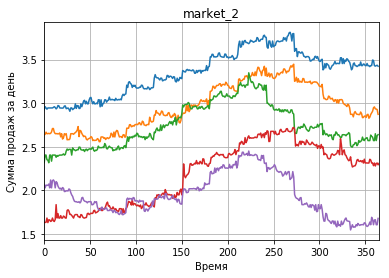

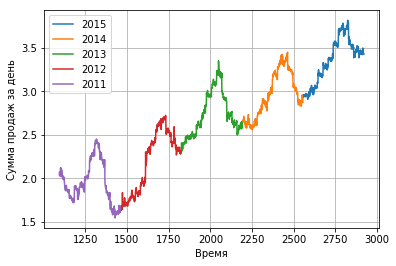

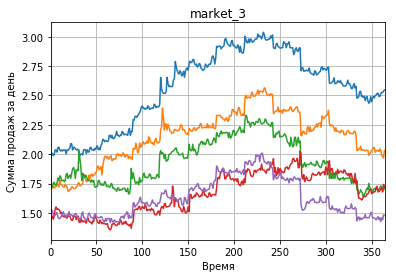

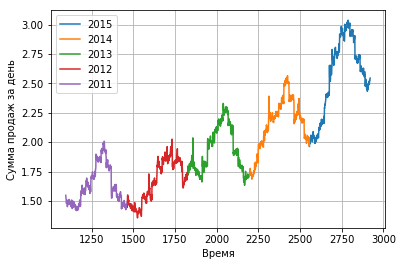

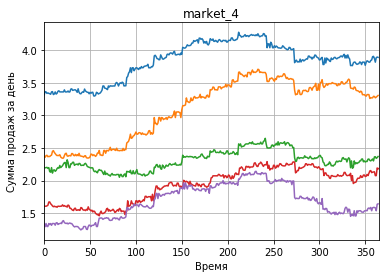

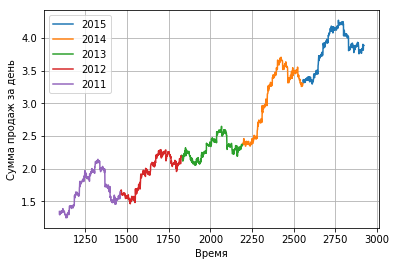

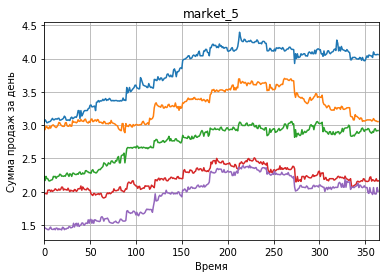

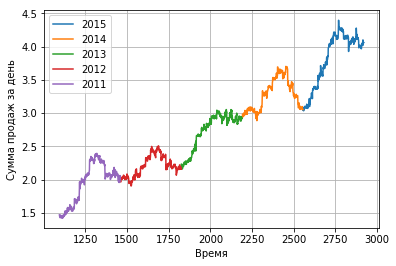

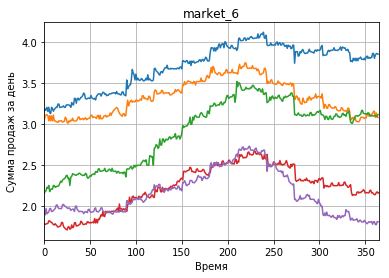

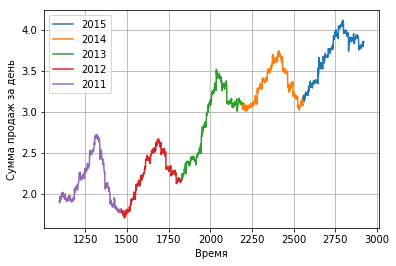

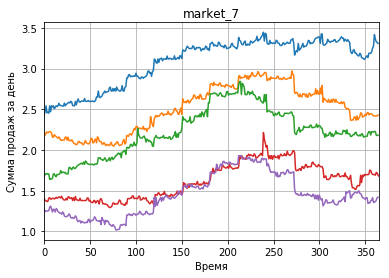

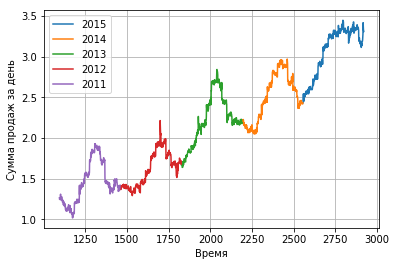

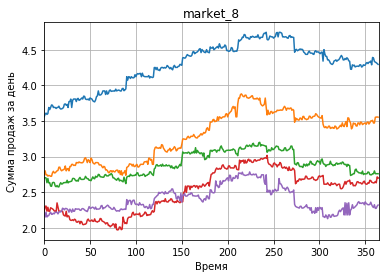

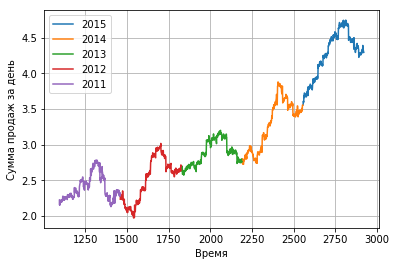

In [47]:
# Построим графики market рядов по годам 
# верхний графий - распределение значений каждого года на линии года ( 0 - 365 )
# нижний график - продажи по годам

for col in df.columns[1:9]:
    plt.plot(dfq.query('year==2015')[col].values)
    plt.plot(dfq.query('year==2014')[col].values)
    plt.plot(dfq.query('year==2013')[col].values)
    plt.plot(dfq.query('year==2012')[col].values)
    plt.plot(dfq.query('year==2011')[col].values)
    plt.title(col)
    plt.xlabel('Время')
    plt.ylabel('Сумма продаж за день')
    plt.autoscale(enable=True, axis='x', tight=True)
    plt.grid(True)   
    plt.show();
    plt.plot(dfq.query('year==2015')[col])
    plt.plot(dfq.query('year==2014')[col])
    plt.plot(dfq.query('year==2013')[col])
    plt.plot(dfq.query('year==2012')[col])
    plt.plot(dfq.query('year==2011')[col])
    plt.legend(['2015', '2014', '2013', '2012', '2011'])
    plt.xlabel('Время')
    plt.ylabel('Сумма продаж за день')
    plt.grid(True)
    plt.show();

### На каждом из графиков видно:
    1. Практически линейный тренд на увеличение продаж.
    2. Ярко-выраженную сезонность в летний период времени

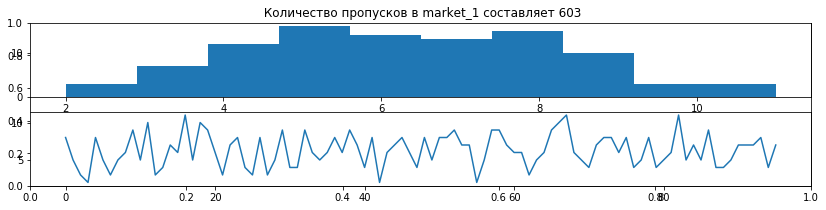

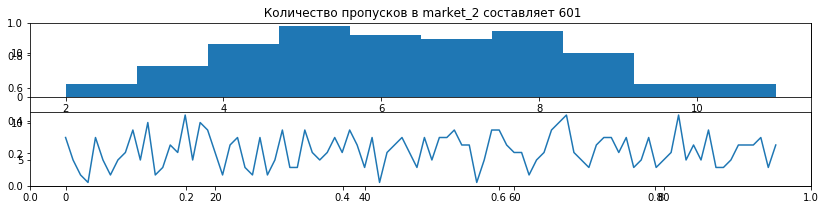

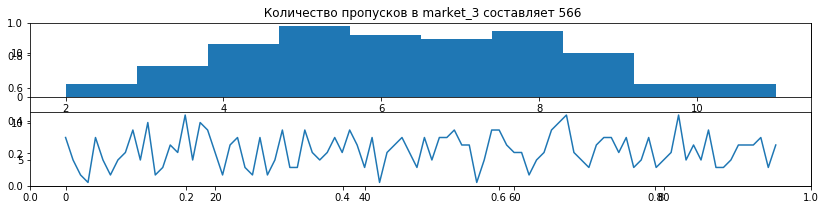

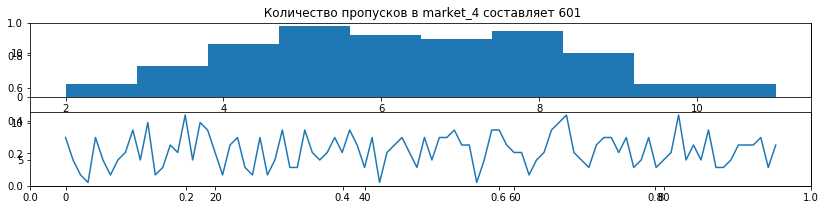

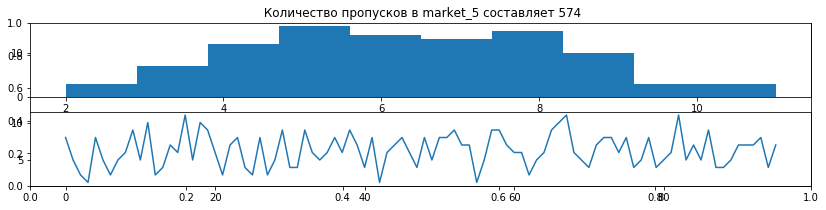

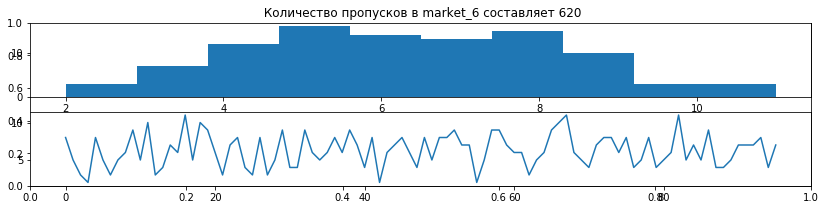

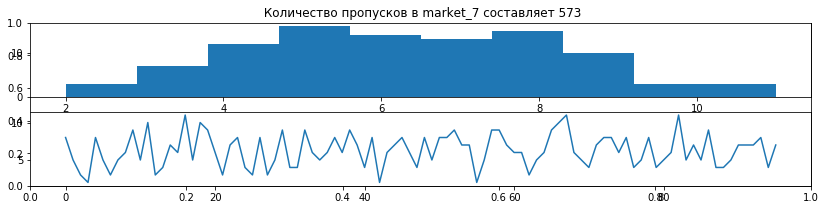

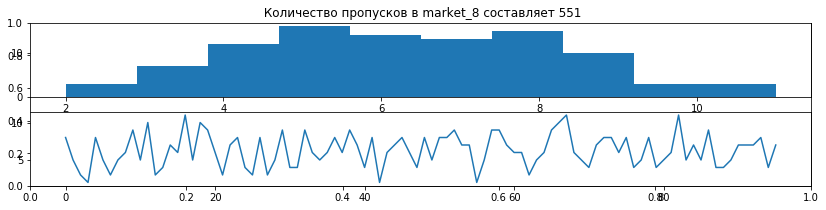

In [52]:
# видно из таблицы, что достаточно много пропусков. Соберем их и построим распределение
a=[]
for col in df.columns[1:9]:
    for i in df.year.unique():
        for o in df.month.unique():
            a.append(np.isnan(df[(df['year']==i) & (df['month']==o)]['market_1']).sum())
    fig = plt.figure()
    plt.title(f' Количество пропусков в {col} составляет {int(np.isnan(df[[col]]).sum())}')
    ax1 = fig.add_subplot(211)
    ax1.hist(a)
    ax2 = fig.add_subplot(212)
    ax2.plot(a)
    plt.show()    
    a=[]    

### Нам не известна природа этих пропусков.  Есть 2 варианта: 
1. Не было продаж в эти дни
2. Не логировалисть продажи в эти дни в базу по каким-то причинам

Поэтому попробуем запомнить распредение этих пропусков чтобы при прогнозе наложить пробелы.
Для обучения заполним пустые NaN средними значениями по месяцу в этом году 


In [10]:
# Заполним средними значениями

dfq=df.copy()
a=0
b=[]

for col in df.columns[1:9]:
    for i in df.year.unique():
        for o in df.month.unique():
            a = np.median(df[(df['year']==i) & (df['month']==o)][col][~np.isnan(df[(df['year']==i) \
                                                                                & (df['month']==o)][col])])
            b.append( np.array(df[(df['year']==i) & (df['month']==o)][col].fillna(a)))      
    b=list(np.concatenate(b))
    dfq[col]=b
    b=[]

In [57]:
# Создадим фрейм по 1 магазину

full_df= pd.concat([dfq, df1])
m1=dfq[['date', 'market_1']]
m1.columns=['ds', 'y']

In [68]:
# добавим дни акций

promo = pd.DataFrame({
  'holiday': 'promo',
  'ds': pd.to_datetime(list(df2[df2['market_1']>0]['date']) + list(df3[df3['market_1']>0]['date'])),
  'lower_window': 0,
  'upper_window': 1})

In [70]:
# обучим подельку от фейсбука  Proohet

m = Prophet(holidays=promo)
forecast = m.fit(m1).predict(future)

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/anaconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



In [71]:
# Посмотрим есть ли влияние акций. И да, оно есть но незначительное
forecast[forecast['promo'].abs() > 0][['ds', 'promo']][-10:]

,ds,promo
1645,2012-07-04,0.119350
1646,2012-07-05,0.035133
2036,2013-07-30,0.119350
2037,2013-07-31,0.035133
2629,2015-03-15,0.119350
2630,2015-03-16,0.035133
3081,2016-06-09,0.119350
3082,2016-06-10,0.035133
3354,2017-03-09,0.119350
3355,2017-03-10,0.035133


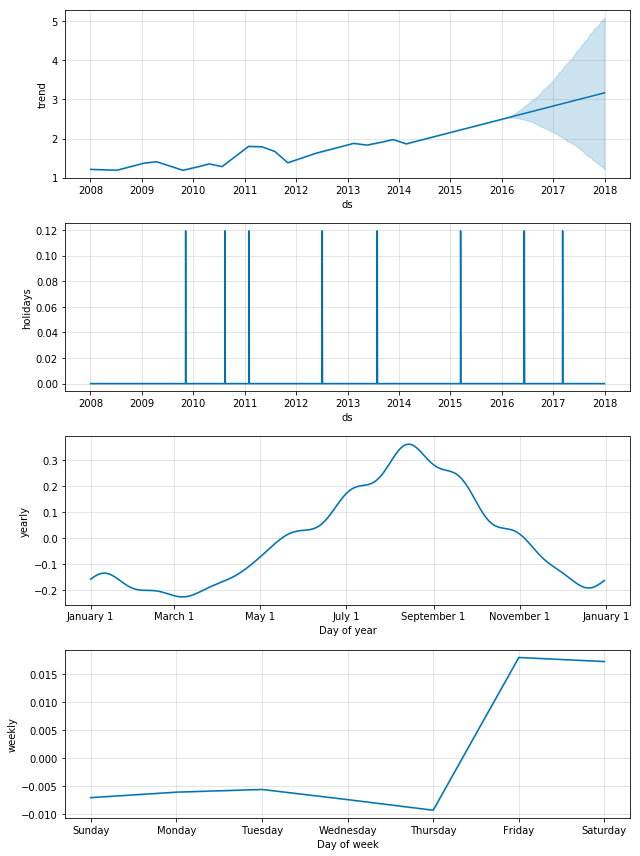

In [72]:
fig = m.plot_components(forecast)

In [73]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(m, initial='730 days', period='180 days', horizon = '365 days')
df_cv.head()

INFO:fbprophet.diagnostics:Making 11 forecasts with cutoffs between 2010-01-26 00:00:00 and 2014-12-31 00:00:00
/anaconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2010-01-27,1.074996,1.023230,1.130146,1.027131,2010-01-26
1,2010-01-28,1.074185,1.024157,1.128802,1.024578,2010-01-26
2,2010-01-29,1.102447,1.047638,1.159499,1.049855,2010-01-26
3,2010-01-30,1.104175,1.049689,1.161299,1.077186,2010-01-26
4,2010-01-31,1.080332,1.026715,1.132958,1.001676,2010-01-26


In [74]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,coverage
1861,37 days,0.007428,0.086188,0.068284,0.039389,0.578554
36,37 days,0.007434,0.086220,0.068333,0.039419,0.576060
2226,37 days,0.007452,0.086322,0.068505,0.039526,0.573566
3321,37 days,0.007485,0.086517,0.068761,0.039620,0.571072
1131,37 days,0.007528,0.086764,0.069016,0.039741,0.568579


In [440]:
# получаем достаточно низкие rmse, что означает высокую надежность предсказаний.
np.mean(df_p['rmse'])

0.34388476090676123

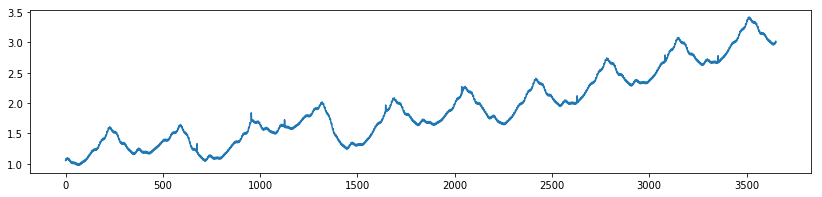

In [76]:
#Построим Прогноз
plt.plot(forecast['yhat'])

### Исползуем данные из forecact для построения алгоритма XGBoost чтобы попробовать улучшить результат. 

In [77]:
# Попробуем улучшить прогноз с помощью XGBoost
from sklearn import cross_validation, tree, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score
import xgboost

/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning:

This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.



In [78]:
X_train= forecast[forecast['ds']<'2016-01-01']
X_test = forecast[forecast['ds']>='2016-01-01']

y_train=X_train['yhat']
y_test=X_test['yhat']

del X_train['yhat']
del X_test['yhat']
del X_train['ds']
del X_test['ds']

In [81]:
import xgboost as xgb
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test)

In [82]:
params = {
        'objective': 'reg:linear',
        'booster':'gblinear'}
trees = 1000
cv = xgb.cv(params, dtrain, metrics = ('rmse'), verbose_eval=False, nfold=10, show_stdv=False, num_boost_round=trees)

In [83]:
bst = xgb.train(params, dtrain, num_boost_round=cv['test-rmse-mean'].argmin())
deviation = cv.loc[cv['test-rmse-mean'].argmin()]["test-rmse-mean"]

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning:

'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning:

'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.



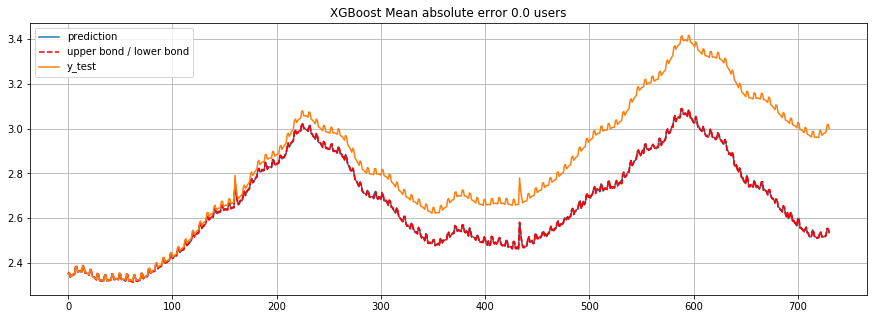

In [85]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
prediction_test = bst.predict(dtest)
scale=1.96
lower = prediction_test-scale*deviation
upper = prediction_test+scale*deviation

Anomalies = np.array([np.NaN]*len(y_test))
Anomalies[y_test<lower] = y_test[y_test<lower]

plt.figure(figsize=(15, 5))
plt.plot(prediction_test, label="prediction")
plt.plot(lower, "r--", label="upper bond / lower bond")
plt.plot(upper, "r--")
plt.plot(list(y_test), label="y_test")
plt.plot(Anomalies, "ro", markersize=10)
plt.legend(loc="best")
plt.axis('tight')
plt.title("XGBoost Mean absolute error {} users".format(round(mean_absolute_error(prediction_test, y_test))))
plt.grid(True)
plt.legend()

### Попробуем линейную регрессию на тех же данных 

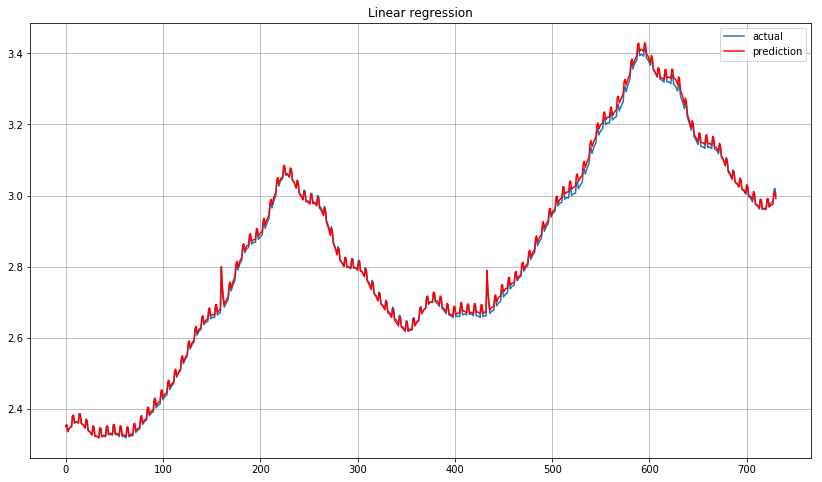

In [87]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
prediction = lr.predict(X_test)

plt.figure(figsize=(14, 8))
plt.plot(y_test.values, label="actual")
plt.plot(prediction, "r", label="prediction")
plt.legend(loc="best")
plt.title("Linear regression")
plt.grid(True);

### Никакого прироста информации нам не дала, и к тому же сгладила акции

 Сделаем предсказания для всех магазинов и запишем их в финальный файл

In [380]:
deploy=df1.copy()

In [381]:
def make_predictions (col):    

    m1=dfq[['date', col]]
    m1.columns=['ds', 'y']

    promo = pd.DataFrame({
                          'holiday': 'promo',
                          'ds': pd.to_datetime(list(df2[df2[col]>0]['date']) + list(df3[df3[col]>0]['date'])),
                          'lower_window': 0,
                          'upper_window': 1})
    

    m = Prophet(holidays=promo)
    m.fit(m1)
    future = m.make_future_dataframe(periods=729)
    forecast = m.predict(future)
    #pred= forecast[forecast['ds']>='2016-01-01']['yhat']
    deploy[col] = forecast[forecast['ds']>='2016-01-01']['yhat'].reset_index()['yhat']
    
    return deploy[col]

In [383]:
for i in deploy.columns[1:9]:
    deploy[i] = make_predictions(i)

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/anaconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seas

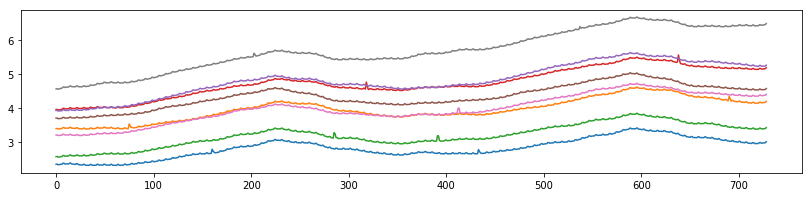

In [384]:
for i in deploy.columns[1:9]:
    plt.plot(deploy[i])

### Соединим датафреймы из прошлого и будующего и построим графики

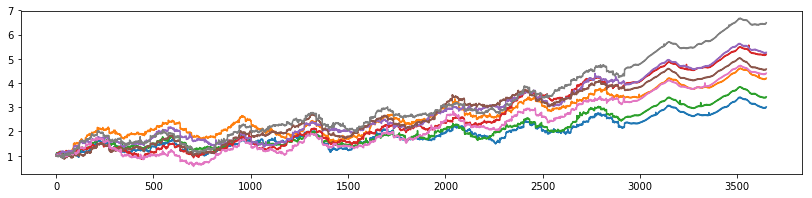

In [385]:
full_df= pd.concat([dfq, deploy]).reset_index()

for i in full_df.columns[2:10]:
    plt.plot(full_df[i])

### В итоге получили полностью заполненный временной ряд с прогнозом.

Теперь попробуем восстановить пропуски Nan

In [386]:
import random

dp=deploy.copy()
dp.index=dp.date
#a=0
#b=[]

for col in dp.columns[1:9]:
    for i in dp.year.unique():
        for o in dp.month.unique():
            k = random.randint(5 , 7)
            while k != 0:
                dp.loc[random.choice(deploy.date),col] = np.nan
                k -= 1

In [387]:
dp.head()

,date,market_1,market_2,market_3,market_4,market_5,market_6,market_7,market_8,year,quarter,month,weekday
date,,,,,,,,,,,,,
2016-01-01,2016-01-01,2.351647,3.401026,2.576174,3.961648,3.933637,3.709417,NaN,4.565072,2016,1,1,4
2016-01-02,2016-01-02,2.355864,3.404035,NaN,3.965943,NaN,3.709845,NaN,4.573316,2016,1,1,5
2016-01-03,2016-01-03,NaN,3.386885,2.560655,3.949593,3.917565,3.690865,3.197865,4.558622,2016,1,1,6
2016-01-04,2016-01-04,2.341984,3.390455,2.563286,3.952648,3.918170,3.695009,NaN,4.567613,2016,1,1,0
2016-01-05,2016-01-05,2.346777,3.394869,NaN,NaN,3.921365,NaN,NaN,4.573189,2016,1,1,1


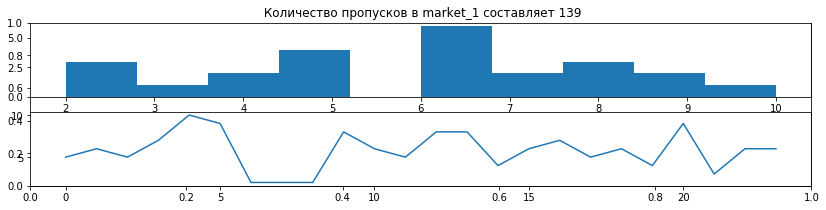

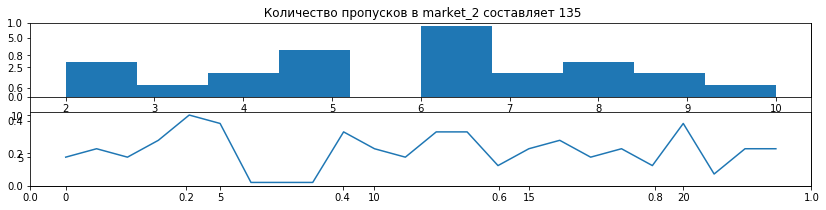

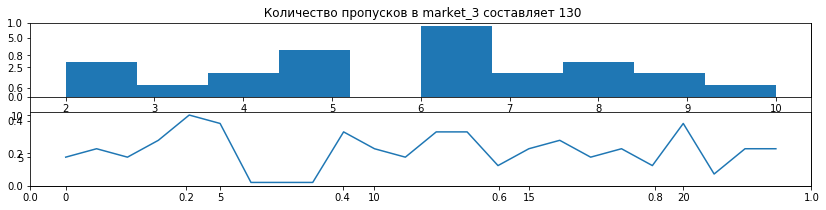

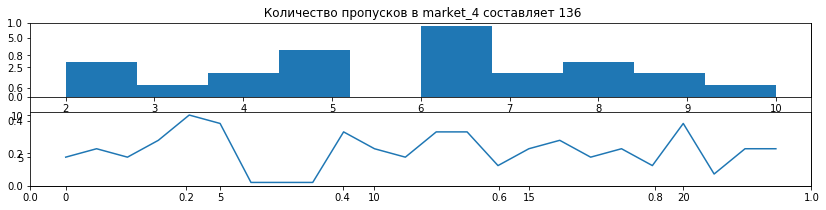

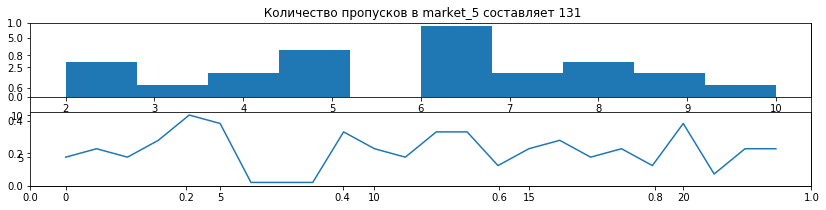

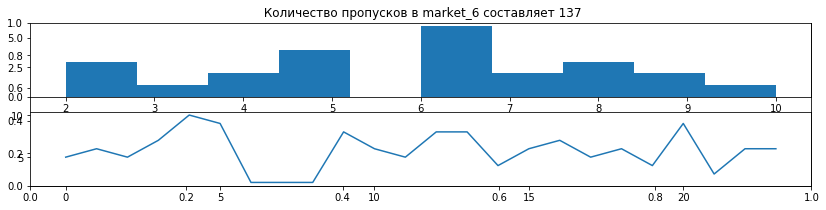

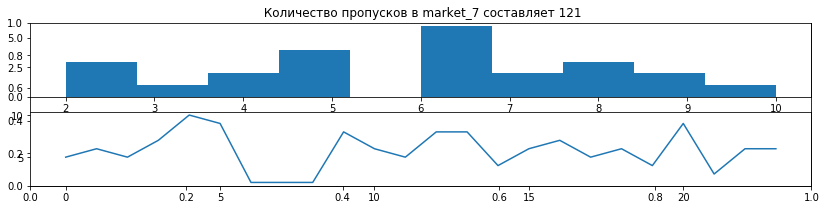

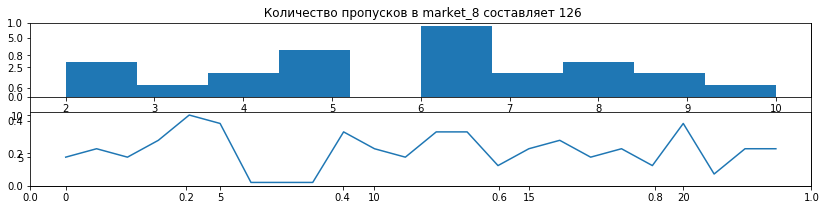

In [388]:
# посмотрим что получилось
a=[]
for col in dp.columns[1:9]:
    for i in dp.year.unique():
        for o in dp.month.unique():
            a.append(np.isnan(dp[(dp['year']==i) & (dp['month']==o)]['market_1']).sum())
    fig = plt.figure()
    plt.title(f' Количество пропусков в {col} составляет {int(np.isnan(dp[[col]]).sum())}')
    ax1 = fig.add_subplot(211)
    ax1.hist(a)
    ax2 = fig.add_subplot(212)
    ax2.plot(a)
    plt.show()    
    a=[]    

In [443]:
deploy.drop(columns=['year', 'quarter', 'month', 'weekday'], inplace=True)
deploy.to_csv('deploy_if_in_real_could_not_be_NaN.csv')

dp.drop(columns=['year', 'quarter', 'month', 'weekday'], inplace=True)
dp.to_csv('deploy_with_NaN.csv')

## Другие попытки

In [248]:
#del full_df['date']
#full_df=full_df.reset_index()

full_df[full_df['date']=='2016-01-01']

,date,index,market_1,market_2,market_3,market_4,market_5,market_6,market_7,market_8,year,quarter,month,weekday
2921,2016-01-01,0,2.351647,3.401026,2.576174,3.961648,3.933637,3.709417,3.21157,4.565072,2016,1,1,4


In [269]:
#full_df.index=full_df['date']

train=full_df[['date','market_1']][0:2921]
test=full_df[['date','market_1']][2921:]

train.Timestamp = pd.to_datetime(train.date,format='%Y-%m-%d ') 
train.index = train.Timestamp 
train = train.resample('D').mean() 
test.Timestamp = pd.to_datetime(test.date,format='%Y-%m-%d ') 
test.index = test.Timestamp 
test = test.resample('D').mean()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access



In [45]:
def predict(series, N, n_pred):
    new_series = series.copy()
    for _ in range(n_pred):
        new_series = new_series.append(pd.Series([new_series[-N:].mean()]), ignore_index=True)
    return new_series

series_pred = predict(dfq['market_1'], 700, 730)

In [447]:
def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for [key, value] in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)
    
def tsplot(y, lags=None, figsize=(14, 8), style='bmh'):
    test_stationarity(y)
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        plt.figure(figsize=figsize)
        layout = (4, 1)
        ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
        acf_ax = plt.subplot2grid(layout, (2, 0))
        pacf_ax = plt.subplot2grid(layout, (3, 0))

        y.plot(ax=ts_ax, color='blue', label='Or')
        ts_ax.set_title('Original')

        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)

        plt.tight_layout()
    return

In [580]:
series = dfq['market_1']

Results of Dickey-Fuller Test:
Test Statistic                  -1.058165
p-value                          0.731464
#Lags Used                       7.000000
Number of Observations Used    357.000000
Critical Value (1%)             -3.448801
Critical Value (5%)             -2.869670
Critical Value (10%)            -2.571101
dtype: float64


/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1283: RuntimeWarning:

invalid value encountered in sqrt



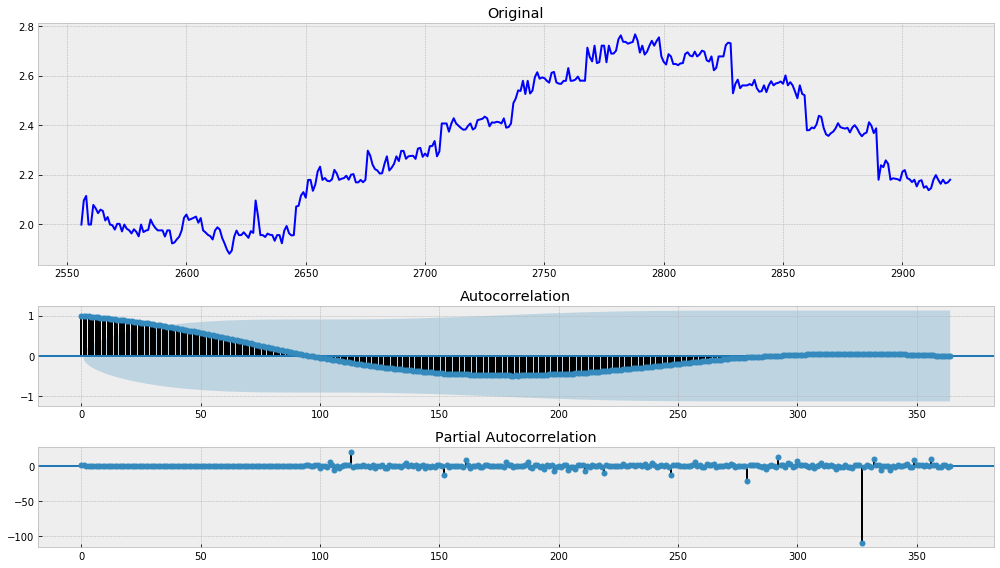

In [453]:
tsplot(series)

### Ряд не стационарный и следовательно для его анализа необходимо привести к стационарности. 

In [581]:
series = boxcox(dfq['market_1'],0)
series = series[1:] - series[:-1]

Results of Dickey-Fuller Test:
Test Statistic                -7.293485e+00
p-value                        1.397399e-10
#Lags Used                     6.000000e+00
Number of Observations Used    3.570000e+02
Critical Value (1%)           -3.448801e+00
Critical Value (5%)           -2.869670e+00
Critical Value (10%)          -2.571101e+00
dtype: float64


/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1283: RuntimeWarning:

invalid value encountered in sqrt



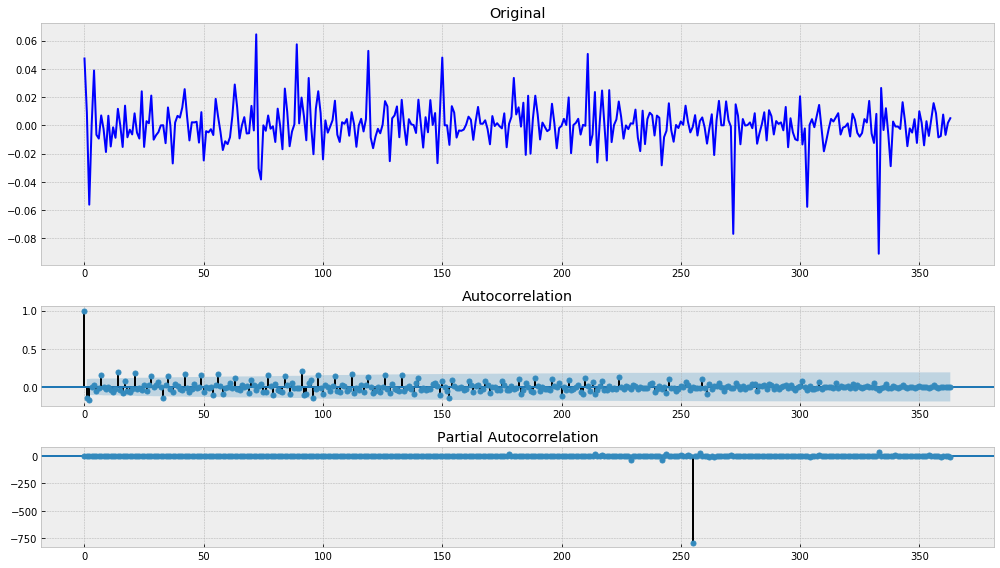

In [456]:
tsplot(series)

### Теперь ряд стационарный и можно использовать модель ARIMA

In [515]:
import warnings
warnings.filterwarnings("ignore")
def _get_best_model(TS):
    best_aic = np.inf 
    best_order = None
    best_mdl = None

    for i in range(5):
        for d in range(5):
            for j in range(5):
                try:
                    tmp_mdl = smt.ARIMA(series, order=(i,d,j)).fit(
                        method='mle', trend='nc'
                    )
                    tmp_aic = tmp_mdl.aic
                    if tmp_aic < best_aic:
                        best_aic = tmp_aic
                        best_order = (i, d, j)
                        best_mdl = tmp_mdl
                except: continue
    print('aic: {:6.5f} | order: {}'.format(best_aic, best_order))                    
    return best_aic, best_order, best_mdl

aic, order, mdl = _get_best_model(series)

aic: -14402.02642 | order: (3, 0, 3)


Results of Dickey-Fuller Test:
Test Statistic                -7.293485e+00
p-value                        1.397399e-10
#Lags Used                     6.000000e+00
Number of Observations Used    3.570000e+02
Critical Value (1%)           -3.448801e+00
Critical Value (5%)           -2.869670e+00
Critical Value (10%)          -2.571101e+00
dtype: float64


/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1283: RuntimeWarning:

invalid value encountered in sqrt



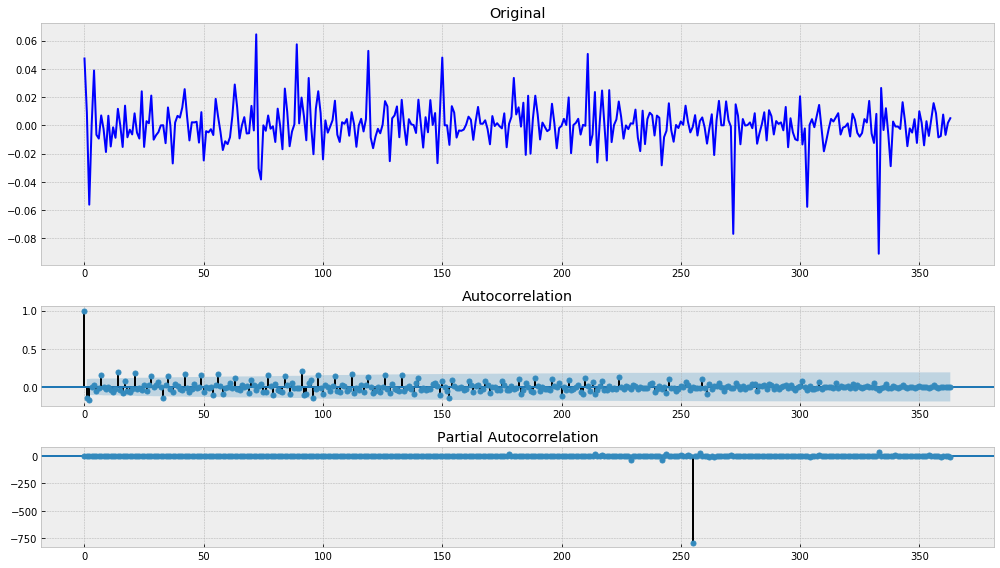

In [462]:
tsplot(series)

In [516]:
# Используем найденные параметры Аримой для построения Sarimax

In [582]:
mod = sm.tsa.statespace.SARIMAX(series,
                                order=(3, 0, 3),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0331      0.155     -0.214      0.831      -0.336       0.270
ar.L2         -0.6753      0.067    -10.144      0.000      -0.806      -0.545
ar.L3          0.2606      0.088      2.959      0.003       0.088       0.433
ma.L1         -0.1159      0.180     -0.642      0.521      -0.469       0.238
ma.L2          1.2213      0.120     10.189      0.000       0.986       1.456
ma.L3         -0.7082      0.154     -4.604      0.000      -1.010      -0.407
ar.S.L12    8.318e-05   6.87e-05      1.211      0.226   -5.14e-05       0.000
ma.S.L12      -1.0085      0.007   -151.187      0.000      -1.022      -0.995
sigma2         0.0002    3.6e-05      6.079      0.000       0.000       0.000


In [583]:
pred = results.get_prediction(start=150, dynamic=False)
pred_ci = pred.conf_int()

In [584]:
y_forecasted = pred.predicted_mean

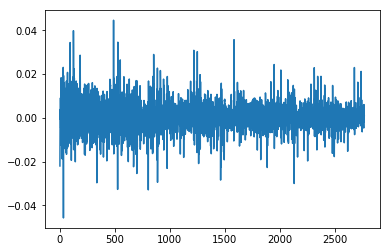

In [585]:
plt.plot(y_forecasted)

The Mean Squared Error of our forecasts is 0.00043


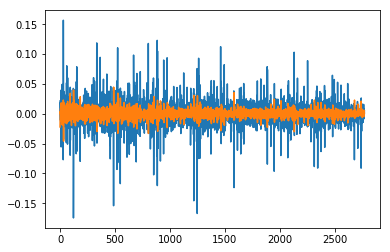

In [586]:
y_forecasted = pred.predicted_mean
y_truth = series[150:]
# Посчитаем среднюю ошибку
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 5)))

plt.plot(y_truth)
plt.plot(y_forecasted)


### MSE достаточно низкий и модель в большинстве случаев работает отлино, но как видно из графика не ловит экстремальные значения. Теперь сделаем модель динамической.

In [587]:
pred_dynamic = results.get_prediction(start=150, dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

The Mean Squared Error of our forecasts is 0.00051


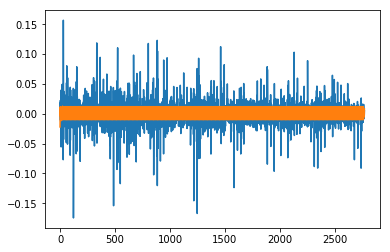

In [588]:
y_forecasted = pred_dynamic.predicted_mean
y_truth = series[150:]
# Посчитаем среднюю ошибку
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 5)))

plt.plot(y_truth)
plt.plot(y_forecasted)

In [589]:
# Получим прогноз на 2 года вперед шагов вперёд
pred_uc = results.get_forecast(steps=729)
# Получим интервал прогноза
pred_ci = pred_uc.conf_int()

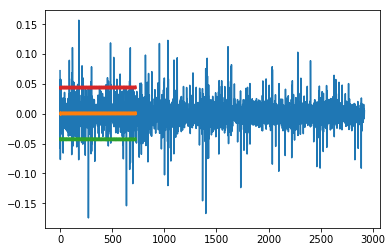

In [590]:
plt.plot(series, label='observed')
plt.plot(pred_uc.predicted_mean, label='Forecast')
plt.plot(pred_ci[1:])

In [593]:
from scipy.special import boxcox, inv_boxcox
k=inv_boxcox(pred_uc.predicted_mean,0)

In [594]:
k = k[1:] + k[:-1]

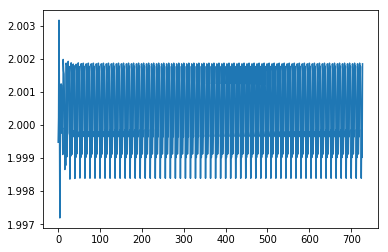

In [597]:
plt.plot(k)

### Попробуем извлечь фичи из временного ряда с  помощью tsfresh

In [430]:
from tsfresh import extract_features
from tsfresh.utilities.dataframe_functions import make_forecasting_frame
from sklearn.ensemble import AdaBoostRegressor
from tsfresh.utilities.dataframe_functions import impute

# Fix needed to pandas datareader
pd.core.common.is_list_like = pd.api.types.is_list_like
#import pandas_datareader.data as web
import datetime

In [433]:
z.index=z['date']
x = z.copy()
del x['date']

In [436]:
df_shift, y = make_forecasting_frame(x["market_1"], kind="sales", max_timeshift=730, rolling_direction=1)
print(df_shift.shape)
df_shift.head()

(1865515, 4)


,time,value,id,kind
1862595,2008-01-02,1.000000,2008-01-03,sales
1859676,2008-01-02,1.000000,2008-01-04,sales
1862596,2008-01-03,1.074911,2008-01-04,sales
1856758,2008-01-02,1.000000,2008-01-05,sales
1859677,2008-01-03,1.074911,2008-01-05,sales


In [437]:
%%capture
X = extract_features(df_shift, column_id="id", column_sort="time", column_value="value", impute_function=impute,
                     show_warnings=False)

In [438]:
print(X.shape)
X = X.loc[:, X.apply(pd.Series.nunique) != 1] 
print(X.shape)

(2920, 794)
(2920, 729)


In [ ]:
В итого сгенерировано более 

In [441]:
X.head()

variable,value__abs_energy,value__absolute_sum_of_changes,"value__agg_autocorrelation__f_agg_""mean""","value__agg_autocorrelation__f_agg_""median""","value__agg_autocorrelation__f_agg_""var""","value__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""intercept""","value__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""rvalue""","value__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""slope""","value__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""stderr""","value__agg_linear_trend__f_agg_""max""__chunk_len_50__attr_""intercept""",...,value__symmetry_looking__r_0.75,value__symmetry_looking__r_0.8,value__symmetry_looking__r_0.8500000000000001,value__symmetry_looking__r_0.9,value__symmetry_looking__r_0.9500000000000001,value__time_reversal_asymmetry_statistic__lag_1,value__time_reversal_asymmetry_statistic__lag_2,value__time_reversal_asymmetry_statistic__lag_3,value__value_count__value_1,value__variance
id,,,,,,,,,,,,,,,,,,,,,
2008-01-03,1.000000,0.000000,0.000000,0.000000,0.000000,1.415422,0.423465,0.004457,0.001102,1.517702,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,1.0,0.000000
2008-01-04,2.155433,0.074911,-1.000000,-1.000000,0.000000,1.415422,0.423465,0.004457,0.001102,1.517702,...,1.0,1.0,1.0,1.0,1.0,0.000000,0.000000,0.0,1.0,0.001403
2008-01-05,3.186041,0.134633,-0.268388,-0.268388,0.482797,1.415422,0.423465,0.004457,0.001102,1.517702,...,1.0,1.0,1.0,1.0,1.0,0.032900,0.000000,0.0,1.0,0.001045
2008-01-06,4.341474,0.194356,-0.382228,-0.901837,0.902235,1.415422,0.423465,0.004457,0.001102,1.517702,...,1.0,1.0,1.0,1.0,1.0,0.016450,0.000000,0.0,1.0,0.001162
2008-01-07,5.333015,0.273505,-0.078068,-0.039026,0.892493,1.415422,0.423465,0.004457,0.001102,1.517702,...,1.0,1.0,1.0,1.0,1.0,-0.003031,-0.008587,0.0,1.0,0.001260


### В данном случае сделал сет для анализа текущего врееннного ряда, но не для прогнозирования. 
Для его прозноза нужно воспользоваться tsfresh.utilities.dataframe_functions.roll_time_series() , 
который будет поочередно окном создавать новые фичи для будущего времени прогнозирования. Но это занимает 
очень много времени.

### Далее на этих фичах можно сделать обучение с помощью деревьев и бустинга



# Попробуем построить прогноз с помощью LSTM

In [389]:
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import plotly.offline as py
import plotly.graph_objs as go

py.init_notebook_mode(connected=True)
%matplotlib inline

In [403]:
#=pd.concat([dfq, df1])
z=dfq[['date', 'market_1']]

In [404]:
from sklearn.preprocessing import MinMaxScaler
values = z['market_1'].values.reshape(-1,1)
values = values.astype('float32')
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

In [405]:
train_size = int(len(scaled) * 0.7)
test_size = len(scaled) - train_size
train, test = scaled[0:train_size,:], scaled[train_size:len(scaled),:]
print(len(train), len(test))

2044 877


In [406]:
def create_dataset(dataset, look_back=360):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back):
        a = dataset[i:(i + look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    print(len(dataY))
    return np.array(dataX), np.array(dataY)

In [418]:
look_back = 5
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

2039
872


In [419]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [420]:
model = Sequential()
model.add(LSTM(100, input_shape=(trainX.shape[1], trainX.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
history = model.fit(trainX, trainY, epochs=300, batch_size=100, validation_data=(testX, testY), verbose=0, shuffle=False)

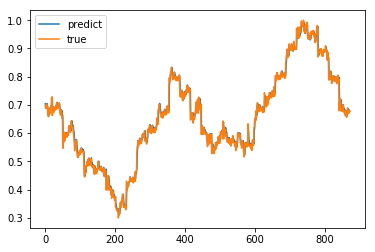

In [421]:
yhat = model.predict(testX)
pyplot.plot(yhat, label='predict')
pyplot.plot(testY, label='true')
pyplot.legend()
pyplot.show()

Test RMSE: 0.035


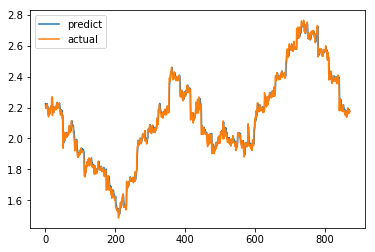

In [422]:
yhat_inverse = scaler.inverse_transform(yhat.reshape(-1, 1))
testY_inverse = scaler.inverse_transform(testY.reshape(-1, 1))

rmse = sqrt(mean_squared_error(testY_inverse, yhat_inverse))
print('Test RMSE: %.3f' % rmse)

pyplot.plot(yhat_inverse, label='predict')
pyplot.plot(testY_inverse, label='actual')
pyplot.legend()
pyplot.show()

In [402]:
predictDates = n.tail(len(testX)).index

testY_reshape = testY_inverse.reshape(len(testY_inverse))
yhat_reshape = yhat_inverse.reshape(len(yhat_inverse))

actual_chart = go.Scatter(x=predictDates, y=testY_reshape, name= 'Actual')
predict_chart = go.Scatter(x=predictDates, y=yhat_reshape, name= 'Predict')
py.iplot([predict_chart, actual_chart])

### Для форкаста здесь так же следует пробеаться окном, но еще не разобрался как. 